<a href="https://colab.research.google.com/github/Khushil-Modi/SJSU/blob/main/CMPE%20258/Assignment%204/CMPE_258_Assignment_4(c).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Name: Khushil Modi**

**SJSU ID: 015923115** 

**Aim: Do keras  classifier for regression problem, image problem and artifacts links follow all best practices like normalization etc.**

##Image Classifier


---

####MNIST Dataset

In [28]:
# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [29]:
import tensorflow as tf
from tensorflow import keras

print("Tensorflow version" , tf.__version__)
print("Keras version" , keras.__version__)


Tensorflow version 2.8.0
Keras version 2.8.0


In [30]:
#Loading the MNIST dataset

fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [31]:
# Lets see the number of images in the training set
X_train_full.shape

(60000, 28, 28)

In the next step, we will divide the training dataset into a tarining and a validation dataset , which will be used in further steps. In additon, we will scale the pixels into range(0,1) .

In [32]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

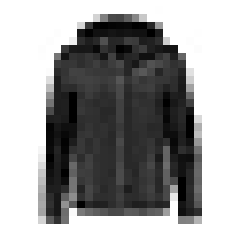

In [33]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [34]:
#Names of Classes

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [35]:
print("The records in validaton set is",X_valid.shape) # 5000 images
print("The records in Testing set is",X_test.shape) # 10000 records

The records in validaton set is (5000, 28, 28)
The records in Testing set is (10000, 28, 28)


Saving figure fashion_mnist_plot


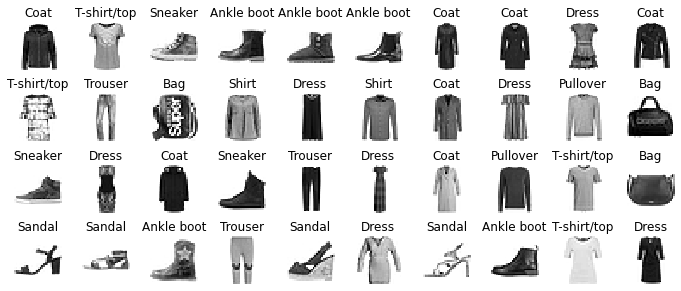

In [36]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_plot', tight_layout=False)
plt.show()

In [37]:
# Defining the Keras model
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [38]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [39]:
model.layers

In [40]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 300)               235500    
                                                                 
 dense_7 (Dense)             (None, 100)               30100     
                                                                 
 dense_8 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


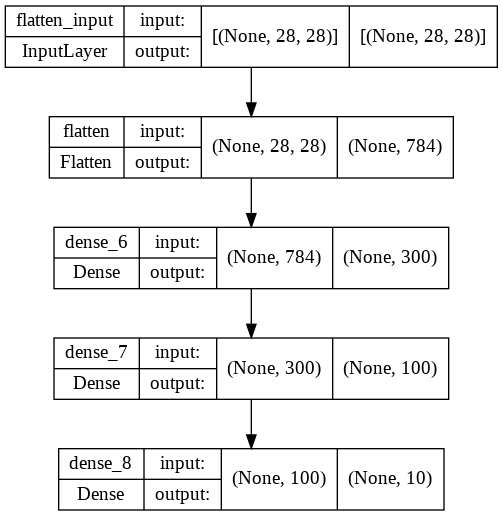

In [41]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

In [42]:
# Now, we will compile the model
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [43]:
# let us fit the model at 30 epochs
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7153 - accuracy: 0.7660 - val_loss: 0.5201 - val_accuracy: 0.8214
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4867 - accuracy: 0.8297 - val_loss: 0.4378 - val_accuracy: 0.8518
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4413 - accuracy: 0.8448 - val_loss: 0.5166 - val_accuracy: 0.8110
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4147 - accuracy: 0.8560 - val_loss: 0.3966 - val_accuracy: 0.8676
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3964 - accuracy: 0.8611 - val_loss: 0.3782 - val_accuracy: 0.8710
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3781 - accuracy: 0.8670 - val_loss: 0.3734 - val_accuracy: 0.8752
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3654 - accuracy: 0.8709 - val_loss: 0.3666 - val_accuracy:

Saving figure keras_learning_curves_plot


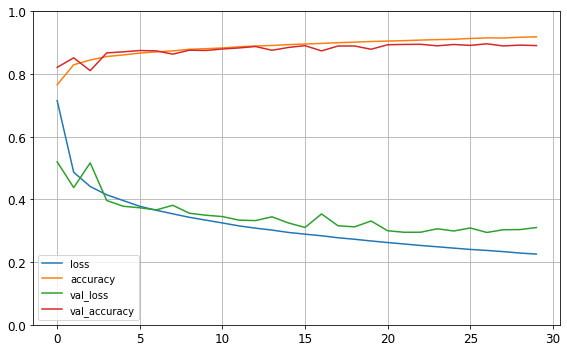

In [44]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
save_fig("keras_learning_curves_plot")
plt.show()

In [45]:
# Let us see how the trained model on the testing data
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3444 - accuracy: 0.8785


[0.3444409668445587, 0.8784999847412109]

In [46]:
# Let us take 3 examples and see if it recognizes correctly
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

In [47]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.02, 0.  , 0.97],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

Saving figure fashion_mnist_images_plot


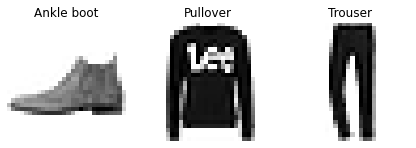

In [48]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_images_plot', tight_layout=False)
plt.show()

##Regression MLP

---

####California Housing Dataset

In [49]:
#split and scale(normalize) the data using Standard Scaler
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)
#Normalization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [50]:
np.random.seed(102)
tf.random.set_seed(102)

We will create a sequential model and add dense layer with "Relu" activatioon function. Then, we will train the model at 20 Epochs and see how the model works over testing data

In [53]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 2s 3ms/step - loss: 3.0182 - val_loss: 1.5754
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.7990 - val_loss: 0.6497
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6116 - val_loss: 0.5515
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5761 - val_loss: 0.5327
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5534 - val_loss: 0.5214
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5350 - val_loss: 0.5014
Epoch 7/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5194 - val_loss: 0.4806
Epoch 8/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5058 - val_loss: 0.4698
Epoch 9/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4944 - val_loss: 0.4562
Epoch 10/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4843 - val_loss: 0.4418

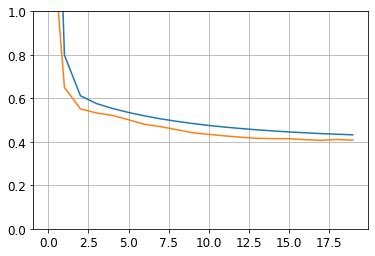

In [54]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

##References:
#####https://github.com/ageron/handson-ml2/blob/master/10_neural_nets_with_keras.ipynb
